# PERSONAL DATA

### **Nurkholiq Agani Hafid**

Instagram: [mecoliqnur](https://www.instagram.com/mecoliqnur/)

Portfolio:
* [LinkedIn](https://www.linkedin.com/in/nurkholiqaganihafid/)
* [Github](https://github.com/nurkholiqaganihafid)
* [Tableau Public](https://public.tableau.com/app/profile/nurkholiq.agani.hafid/vizzes)


# DESCRIPTION

- ***Online Fashion Analysis*** merupakan proyek analisis data yang menggunakan data penjualan dari perusahaan fashion bernama **Dicoding Collection** **(DiCo)**. **DiCo** adalah perusahaan online yang memproduksi dan menjual berbagai item fashion. DiCo menyadari pentingnya data dalam mengembangkan bisnis, sehingga mereka menyimpan semua history penjualan, informasi produk, dan data pelanggan dalam sebuah database.

- **Tujuan** dari proyek ini adalah untuk mengevaluasi performa penjualan perusahaan, memahami produk fashion yang paling banyak dan paling sedikit terjual, serta mendapatkan pemahaman yang lebih dalam tentang demografi pelanggan. Dengan memahami pelanggan secara lebih baik, DiCo dapat membuat strategi *campaign* yang lebih efisien.

- Database ini terdiri dari empat tabel, antara lain **customers**, **orders**, **products**, dan **sales**. [Legend](https://github.com/nurkholiqaganihafid/Online_Fashion_Data_Analysis/blob/main/dataset/Legend.txt)

- Dataset: [DicodingCollection](https://github.com/dicodingacademy/dicoding_dataset/tree/main/DicodingCollection)

Pertanyaan bisnis yang akan dijawab melalui analisis data ini antara lain:

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan yang dimiliki perusahaan?
4. Kapan terakhir kali pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan oleh pelanggan dalam beberapa bulan terakhir?

# DATA WRANGLING

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.rc('axes', grid=True)

%matplotlib inline

## Gathering Data

### Customers

In [2]:
customers_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv')
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


### Orders

In [3]:
orders_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv')
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


### Product

In [4]:
product_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/products.csv')
product_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


### Sales

In [5]:
sales_df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/sales.csv')
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


## Assessing Data

### Customers

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [7]:
customers_df.isnull().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

- Output di atas menunjukkan bahwa terdapat 18 missing values pada kolom `gender`.

In [8]:
print('Number of duplicates in customer data: ', customers_df.duplicated().sum())

Number of duplicates in customer data:  6


In [9]:
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


- Output di atas terdapat inaccurate value pada nilai maksimum pada kolom `age`: 700.00

### Orders

In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


- Tidak ada missing value pada data `orders_df`
- Namun, terdapat kesalahan tipe data pada kolom `order_date` dan `delivery_date`
- Kedua kolom tersebut harusnya tipe data **datetime**, bukan **object**

In [11]:
print('Number of duplicates in order data: ', orders_df.duplicated().sum())

Number of duplicates in order data:  0


In [12]:
orders_df.describe()

,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


- Tidak ada nilai yang aneh dalam output `orders_df` di atas

### Product

In [13]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB


In [14]:
print('Number of duplicates in product data: ', product_df.duplicated().sum())

Number of duplicates in product data:  6


In [15]:
product_df.describe()

,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


### Sales

In [16]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [17]:
sales_df.isnull().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

- Output di atas menunjukkan bahwa terdapat 19 missing values pada kolom `total_price`.

In [18]:
print('Number of duplicates in sale data: ', sales_df.duplicated().sum())

Number of duplicates in sale data:  0


In [19]:
sales_df.describe()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


- Hasil di atas menunjukkan bahwa tidak ada data yang aneh

## Cleaning Data

### Customers

#### Drop duplicate data

In [20]:
customers_df.drop_duplicates(inplace=True)

In [21]:
print('Number of duplicates in customer data: ', customers_df.duplicated().sum())

Number of duplicates in customer data:  0


#### Handling missing values

In [22]:
# Melihat data yang mengandung missing value
customers_df[customers_df.gender.isnull()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


Meskipun baris data tersebut memiliki missing value, tetap terdapat banyak informasi penting yang dapat diekstraksi. Oleh karena itu, dalam kasus ini, kita akan menggunakan metode **imputasi** untuk mengisi nilai yang hilang.

In [23]:
customers_df.gender.value_counts()

Prefer not to say    725
Male                 143
Female               115
Name: gender, dtype: int64

In [24]:
customers_df.gender.fillna(value='Prefer not to say', inplace=True)

In [25]:
customers_df.isnull().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

In [26]:
customers_df.gender.value_counts()

Prefer not to say    743
Male                 143
Female               115
Name: gender, dtype: int64

#### Handling inaccurate values

In [27]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


Dari data tersebut, dapat diasumsikan bahwa nilai yang tidak akurat disebabkan oleh *human error* yang menyebabkan nilai nol yang berlebihan. Oleh karena itu, akan diganti dengan nilai **70**.

In [28]:
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

In [29]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


Ternyata masih ada *invalid value* lain yang terdapat dalam kolom age.

Kemungkinan penyebab kesalahan ini sama dengan sebelumnya, yaitu *human error*  yang menyebabkan nilai nol yang berlebihan. Untuk mengatasi hal ini, kita akan menggantinya dengan nilai **50**.

In [30]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

In [31]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
34,35,fulan 35,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
38,39,fulan 39,Prefer not to say,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
142,143,fulan 143,Prefer not to say,80,87 Hahn Station StSuite 943,8254,New Ella,Victoria,Australia
154,155,fulan 155,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
170,171,fulan 171,Prefer not to say,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
174,175,fulan 175,Prefer not to say,80,57 David MallSuite 596,3129,Haneton,South Australia,Australia
181,182,fulan 182,Male,80,32 Thomas CrestSuite 753,2147,Archiefurt,Queensland,Australia
235,236,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
424,424,fulan 424,Prefer not to say,80,03 Grant CrestSuite 228,5743,Lake Charliemouth,Western Australia,Australia
438,438,fulan 438,Prefer not to say,80,569 Alyssa IslandApt. 766,6893,Hunterland,Western Australia,Australia


In [32]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


Dari hasil tersebut, terlihat bahwa kolom `age` memiliki nilai maksimum yang masuk akal. Selain itu, jika diperhatikan, nilai mean dan standar deviasi juga berubah setelah kita menangani nilai yang tidak akurat.

### Orders

- Dalam proses assessing data sebelumnya, telah diketahui bahwa terdapat kesalahan dalam tipe data untuk kolom `order_date` dan `delivery_date`.
- Kedua kolom ini akan diganti dengan tipe data `datetime`.

In [33]:
datetime_columns = ['order_date', 'delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


### Product

- Dalam proses assessing data sebelumnya, bahwa terdapat 6 data yang duplicate pada `product_df`.
- Maka data duplicate ini akan didrop.

In [35]:
product_df.drop_duplicates(inplace=True)

In [36]:
print('Number of duplicates in product data: ', product_df.duplicated().sum())

Number of duplicates in product data:  0


### Sales

Dari hasil penilaian data sebelumnya, dapat disimpulkan bahwa terdapat 19 nilai yang hilang (missing value) pada kolom `total_price`.

In [37]:
sales_df[sales_df.total_price.isnull()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [38]:
sales_df.head(3)

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0


Dari tampilan data tersebut, kita dapat mengamati bahwa nilai `total_price` diperoleh dengan mengalikan `price_per_unit` dengan `quantity`. Pola ini dapat kita gunakan untuk menangani nilai yang hilang (missing value) pada kolom `total_price`.

In [39]:
sales_df['total_price'] = sales_df['price_per_unit'] * sales_df['quantity']

In [40]:
sales_df.isnull().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

In [41]:
sales_df[sales_df['sales_id'] == 121]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
121,121,27,1027,90,3,270


# EXPLORATORY DATA ANALYSIS

## Customers

In [42]:
customers_df.describe(include='all')

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,New Ava,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


In [43]:
customers_df.groupby(by='gender').agg({
    'customer_id': 'nunique',
    'age': ['max', 'min', 'mean', 'std']
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

In [44]:
customers_df.groupby(by='city').customer_id.nunique().sort_values(ascending=False)

city
East Aidan       3
East Sophia      3
New Ava          3
West Jackfort    2
Corkeryshire     2
                ..
Jordanside       1
Josephland       1
Josephmouth      1
Justinport       1
Zacville         1
Name: customer_id, Length: 961, dtype: int64

In [45]:
customers_df.groupby(by='state').customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

- Terlihat bahwa distribusi pelanggan cukup merata di setiap city dan state.
- City dengan jumlah pelanggan terbanyak adalah East Aidan, East Sophia, dan New Ava, masing-masing memiliki tiga pelanggan.
- Selain itu, state dengan jumlah pelanggan terbanyak adalah South Australia.

## Orders

In [46]:
orders_df.head(2)

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-08-30,2021-09-24
1,2,473,50490,2021-02-03,2021-02-13


Membuat sebuah kolom baru untuk memuat waktu pengiriman tiap order.

In [47]:
delivery_time = orders_df['delivery_date'] - orders_df['order_date']
delivery_time

0     25 days
1     10 days
2     26 days
3     13 days
4      1 days
        ...  
995   20 days
996   13 days
997   16 days
998   27 days
999   17 days
Length: 1000, dtype: timedelta64[ns]

In [48]:
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
delivery_time

0      2160000.0
1       864000.0
2      2246400.0
3      1123200.0
4        86400.0
         ...    
995    1728000.0
996    1123200.0
997    1382400.0
998    2332800.0
999    1468800.0
Length: 1000, dtype: float64

In [49]:
# Selanjutnya diubah ke dalam satuan hari (dibagi 86400)
orders_df['delivery_time'] = round(delivery_time/86_400)

In [50]:
orders_df.head(2)

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0


In [51]:
orders_df.describe(include='all')

<ipython-input-51-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
<ipython-input-51-caf441259110>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')


,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
unique,NaN,NaN,NaN,291,305,NaN
top,NaN,NaN,NaN,2021-06-20 00:00:00,2021-08-09 00:00:00,NaN
freq,NaN,NaN,NaN,10,9,NaN
first,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN
last,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN
mean,500.500000,506.640000,33972.936000,NaN,NaN,14.078000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225
min,1.000000,1.000000,10043.000000,NaN,NaN,1.000000
25%,250.750000,275.250000,21329.250000,NaN,NaN,8.000000


- Dari output tersebut, dapat disimpulkan bahwa rata-rata waktu pengiriman adalah **14 hari**, dengan nilai maksimum **27 hari** dan nilai minimum **1 hari**.

## Orders and Customers

- Pada data orders_df terdapat kolom yang berisi informasi tentang `customer_id` pelanggan yang pernah melakukan order. Informasi ini dapat digunakan untuk mengidentifikasi pelanggan yang **belum** pernah melakukan order.
- Untuk melakukan hal ini, kita dapat membuat kolom baru bernama `status` pada data `customers_df`.
- Kolom `status` ini akan memiliki nilai `"Active"` untuk pelanggan yang pernah melakukan order setidaknya sekali.
- Sebaliknya, kolom `status` akan memiliki nilai `"Non Active"` untuk pelanggan yang belum pernah melakukan order sama sekali.

In [52]:
customer_id_in_orders_df = orders_df.customer_id.tolist()
customers_df['status'] = customers_df['customer_id'].apply(
    lambda x: 'Active' if x in customer_id_in_orders_df else 'Non Active'
)
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
763,761,fulan 761,Prefer not to say,52,080 Tahlia LaneApt. 450,3739,West Aidanton,Victoria,Australia,Active
574,573,fulan 573,Male,37,80 Charles CircuitSuite 023,7541,Abbeyshire,South Australia,Australia,Active
555,554,fulan 554,Prefer not to say,56,821 Isabella JunctionApt. 238,1928,New Benjaminborough,Tasmania,Australia,Active
724,722,fulan 722,Prefer not to say,53,04 Molly PlazaApt. 632,4447,Lillyview,New South Wales,Australia,Non Active
543,543,fulan 543,Prefer not to say,50,9193 Williamson GroveSuite 080,7215,Port Annabelle,Queensland,Australia,Non Active


In [53]:
customers_df.groupby(by='status').customer_id.count()

status
Active        617
Non Active    384
Name: customer_id, dtype: int64

Berdasarkan pivot table di atas, terlihat bahwa terdapat sejumlah pelanggan yang belum pernah melakukan transaksi sebelumnya. Hal ini merupakan suatu kabar buruk karena hampir **30%** dari total pelanggan yang belum pernah melakukan order sebelumnya.

### Merge

Melakukan proses merge untuk memperoleh informasi terkait kedua data tersebut.

In [54]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


### Number of orders by city

In [55]:
orders_customers_df.groupby(by='city').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,city,order_id
0,Jordanside,6
1,New Ava,6
2,Lake Rose,5
3,O'keefeton,5
4,East Max,5
5,Port Hannahburgh,5
6,Rubyfort,5
7,West Kai,5
8,Andrewborough,4
9,Port Aaronton,4


- Kota Jordanside dan New Ava merupakan dua kota yang memiliki jumlah order terbanyak.

In [56]:
orders_customers_df[orders_customers_df['city'] == 'Jordanside']

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
44,45,571,21738,2021-05-30,2021-06-21,22.0,fulan 571,Prefer not to say,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory,Australia,Active
187,188,571,41180,2021-04-10,2021-04-22,12.0,fulan 571,Prefer not to say,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory,Australia,Active
253,254,571,57662,2021-08-07,2021-09-03,27.0,fulan 571,Prefer not to say,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory,Australia,Active
375,376,571,15454,2021-07-04,2021-07-17,13.0,fulan 571,Prefer not to say,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory,Australia,Active
473,474,571,17401,2021-08-19,2021-09-09,21.0,fulan 571,Prefer not to say,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory,Australia,Active
499,500,571,41037,2021-01-15,2021-01-24,9.0,fulan 571,Prefer not to say,22,5567 Clarke MallApt. 756,4043,Jordanside,Australian Capital Territory,Australia,Active


### Number of orders by state

In [57]:
orders_customers_df.groupby(by='state').order_id.nunique().sort_values(ascending=False).reset_index()

,state,order_id
0,South Australia,148
1,Queensland,139
2,Western Australia,130
3,New South Wales,129
4,Australian Capital Territory,118
5,Victoria,118
6,Tasmania,112
7,Northern Territory,106


- South Australia merupakan state yang paling banyak melakukan order.

### Number of orders by gender

In [58]:
orders_customers_df.groupby(by='gender').order_id.nunique().sort_values(ascending=False).reset_index()

,gender,order_id
0,Prefer not to say,725
1,Female,139
2,Male,136


- Berdasarkan output di atas bahwa kebanyakan order dilakukan oleh pelanggan yang berjenis kelamin `prefer not to say`.

### Number of orders by age group

- Mengeksplorasi jumlah order berdasarkan kelompok usia.
- Untuk melakukan hal ini, perlu mendefinisikan sebuah kolom baru bernama `age_group`.
- Kolom ini akan membantu kita dalam mengelompokkan pelanggan ke dalam tiga kelompok, yaitu ***youth***, ***adults***, dan ***seniors***.

In [59]:
orders_customers_df['age_group'] = orders_customers_df.age.apply(
    lambda x: 'Youth' if x <= 24 else (
        'Seniors' if x > 64 else 'Adults'
    )
)

In [60]:
orders_customers_df.groupby(by='age_group').order_id.nunique().sort_values(ascending=False).reset_index()

,age_group,order_id
0,Adults,681
1,Seniors,226
2,Youth,93


- Pelanggan yang paling banyak melakukan order berasal dari kelompok usia `Adults`.

## Product and Sales

In [61]:
product_df.describe(include='all')

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


- Harga barang yang dijual berkisar antara **90** hingga **119** dolar.

In [62]:
sales_df.describe(include='all')

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


- Pada setiap transaksi pelanggan paling banyak membeli tiga buah item (`quantity`) dalam satu jenis produk dengan total harga sebesar **357** dolar.

In [63]:
product_df.sort_values(by='price', ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
704,698,Jacket,Parka,L,violet,119,53,"A violet coloured, L sized, Parka Jacket"
671,665,Jacket,Parka,XS,red,119,65,"A red coloured, XS sized, Parka Jacket"
698,692,Jacket,Parka,M,indigo,119,66,"A indigo coloured, M sized, Parka Jacket"
699,693,Jacket,Parka,L,indigo,119,44,"A indigo coloured, L sized, Parka Jacket"
700,694,Jacket,Parka,XL,indigo,119,78,"A indigo coloured, XL sized, Parka Jacket"
...,...,...,...,...,...,...,...,...
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1228,1222,Trousers,Pleated,M,violet,90,45,"A violet coloured, M sized, Pleated Trousers"


- Dari hasil output di atas bahwa produk termahal yaitu item jaket bernama Parka dan yang termurah bernama Bomber.

In [64]:
product_df.groupby(by='product_type').agg({
    'product_id': 'nunique',
    'quantity': 'sum',
    'price': ['min', 'max']
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [65]:
product_df.groupby(by='product_name').agg({
    'product_id': 'nunique',
    'quantity': 'sum',
    'price': ['min', 'max']
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

### Merge

Menggabungkan tabel `product_df` dan `sales_df` untuk melihat produk yang paling laris.

In [66]:
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


Hasil dari proses merge di atas menunjukkan adanya perbedaan antara nilai `price_per_unit` dan `price`. Perbedaan ini dapat disebabkan oleh adanya **potongan harga**, **biaya operasional**, dan **biaya lainnya yang diperhitungkan**.

In [67]:
sales_product_df.groupby(by='product_type').agg({
    'sales_id': 'nunique',
    'quantity_x': 'sum',
    'total_price': 'sum'
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


- `Trousers` merupakan tipe produk yang paling laris dengan `sales_id` 1683 dan `quantity_x` 3360.
- Akan tetapi, jika dilihat berdasarkan **revenue** (`total_price`) yang diterima, `Jacket` merupakan tipe produk yang paling banyak menyumbang **revenue perusahaan**.

In [68]:
sales_product_df.groupby(by='product_name').agg({
    'sales_id': 'nunique',
    'quantity_x': 'sum',
    'total_price': 'sum'
}).sort_values(by='total_price', ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


- Produk `Denim` merupakan produk yang paling laris dan juga paling banyak menyumbang **revenue** terhadap perusahaan.

## Explore all_df Data

- Tujuan dari langkah ini adalah untuk menganalisis pola pembelian berdasarkan **demografi** pelanggan.
- Untuk itu, kita akan membuat sebuah DataFrame baru yang akan kita sebut sebagai `all_df`.
- DataFrame ini akan digunakan untuk menggabungkan (`merge`) dan menyimpan semua informasi dari keempat tabel yang dimiliki.

In [69]:
all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket",64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


In [70]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sales_id        5000 non-null   int64         
 1   order_id        5000 non-null   int64         
 2   product_id      5000 non-null   int64         
 3   price_per_unit  5000 non-null   int64         
 4   quantity_x      5000 non-null   int64         
 5   total_price     5000 non-null   int64         
 6   product_type    5000 non-null   object        
 7   product_name    5000 non-null   object        
 8   size            5000 non-null   object        
 9   colour          5000 non-null   object        
 10  price           5000 non-null   int64         
 11  quantity_y      5000 non-null   int64         
 12  description     5000 non-null   object        
 13  customer_id     5000 non-null   int64         
 14  payment         5000 non-null   int64         
 15  orde

In [71]:
all_df.groupby(by=['state', 'product_type']).agg({
    'quantity_x': 'sum',
    'total_price': 'sum'
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

- Pivot table di atas memberikan gambaran mengenai preferensi pengguna terhadap `product_type` berdasarkan `state`.
- Tipe produk `Jacket` memiliki penjualan terbanyak di state **New South Wales**, **Queensland**, dan **Tasmania**,.

In [72]:
all_df.groupby(by=['gender', 'product_type']).agg({
    'quantity_x': 'sum',
    'total_price': 'sum'
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

- Total penjualan tertinggi terjadi pada kategori `Prefer not to say` dengan total harga sebesar **255.085** dolar pada `product_type` **Jacket**.

In [73]:
all_df.groupby(by=['age_group', 'product_type']).agg({
    'quantity_x': 'sum',
    'total_price': 'sum'
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

- Total penjualan tertinggi terjadi pada kelompok usia `Adults` dengan total harga sebesar **245.055** dollar.

# DATA VISUALIZATION

## 1st Question

- Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

1. Tujuannya adalah untuk melakukan resampling data `order_date` menjadi **bulanan**.
2. Selain itu, juga akan melakukan agregasi terhadap data tersebut.
3. Agregasi ini bertujuan untuk mendapatkan informasi terkait `jumlah order` dan `total revenue` yang diperoleh **tiap bulan**.

In [74]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    'order_id': 'nunique',
    'total_price': 'sum'
})
monthly_orders_df

,order_id,total_price
order_date,,
2021-01-31,109,119333
2021-02-28,93,95080
2021-03-31,117,131364
2021-04-30,99,97530
2021-05-31,84,85597
2021-06-30,102,101458
2021-07-31,105,116081
2021-08-31,106,104565
2021-09-30,98,96526


In [75]:
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df

,order_date,order_id,total_price
0,January,109,119333
1,February,93,95080
2,March,117,131364
3,April,99,97530
4,May,84,85597
5,June,102,101458
6,July,105,116081
7,August,106,104565
8,September,98,96526
9,October,80,84266


In [76]:
monthly_orders_df.rename(columns={
    'order_id': 'order_count',
    'total_price': 'revenue'
}, inplace=True)

monthly_orders_df.head()

,order_date,order_count,revenue
0,January,109,119333
1,February,93,95080
2,March,117,131364
3,April,99,97530
4,May,84,85597


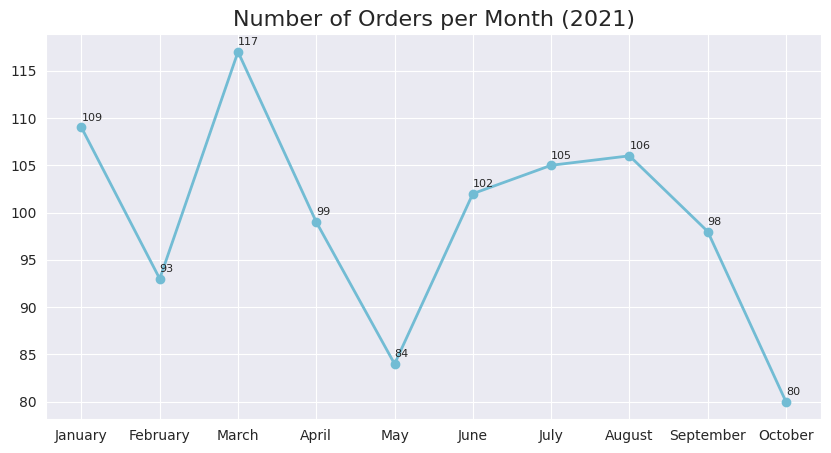

In [77]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df['order_date'],
    monthly_orders_df['order_count'],
    marker='o',
    linewidth=2,
    color='#72BCD4'
)
plt.title('Number of Orders per Month (2021)', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i in range(len(monthly_orders_df)):
    plt.text(
        monthly_orders_df['order_date'][i],
        monthly_orders_df['order_count'][i] + 0.5,
        monthly_orders_df['order_count'][i],
        ha='left',
        va='bottom',
        fontsize=8
    )

- Berdasarkan visualisasi di atas, dapat diamati bahwa bulan dengan jumlah order **terbanyak** adalah **Maret**.
- Selain itu, terdapat **penurunan** yang signifikan dalam jumlah order pada bulan **Februari, April, Mei, dan Oktober**.

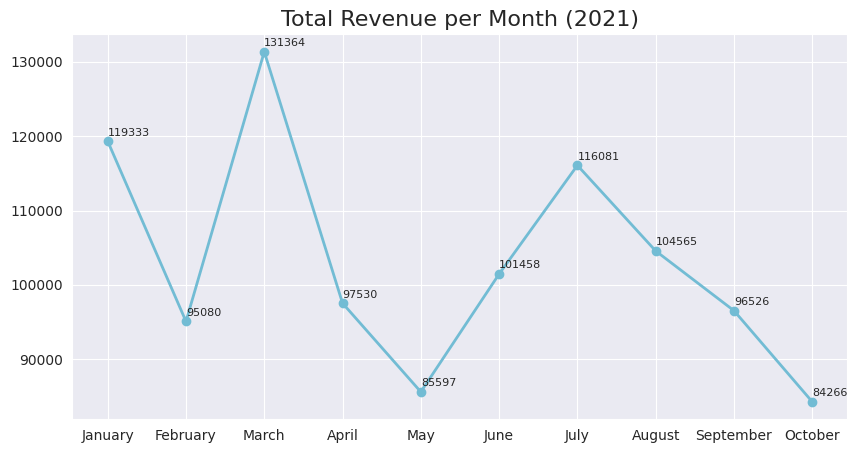

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df['order_date'],
    monthly_orders_df['revenue'],
    marker='o',
    linewidth=2,
    color='#72BCD4'
)
plt.title('Total Revenue per Month (2021)', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i in range(len(monthly_orders_df)):
    plt.text(
        monthly_orders_df['order_date'][i],
        monthly_orders_df['revenue'][i] + 500,
        monthly_orders_df['revenue'][i],
        ha='left',
        va='bottom',
        fontsize=8

    )

- Terdapat **penurunan** yang signifikan dalam jumlah order pada bulan **Februari, April, Mei, dan Oktober.**
- Penurunan ini berdampak pada pendapatan (`revenue`) perusahaan.
- Untuk mengetahui penyebab penurunan tersebut, perlu mempertimbangkan analisis lebih lanjut terkait beberapa faktor seperti keberadaan kompetitor, kampanye pemasaran, dan lain sebagainya.

## 2nd Question

- Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

Tujuan dari pertanyaan ini adalah untuk mengidentifikasi produk dengan penjualan **terbanyak** dan **paling sedikit**.

In [79]:
sum_order_items_df = all_df.groupby(by='product_name').quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(len(sum_order_items_df))

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


Text(0.5, 0.98, 'Best and Worst Performing Product by Number of Sales')

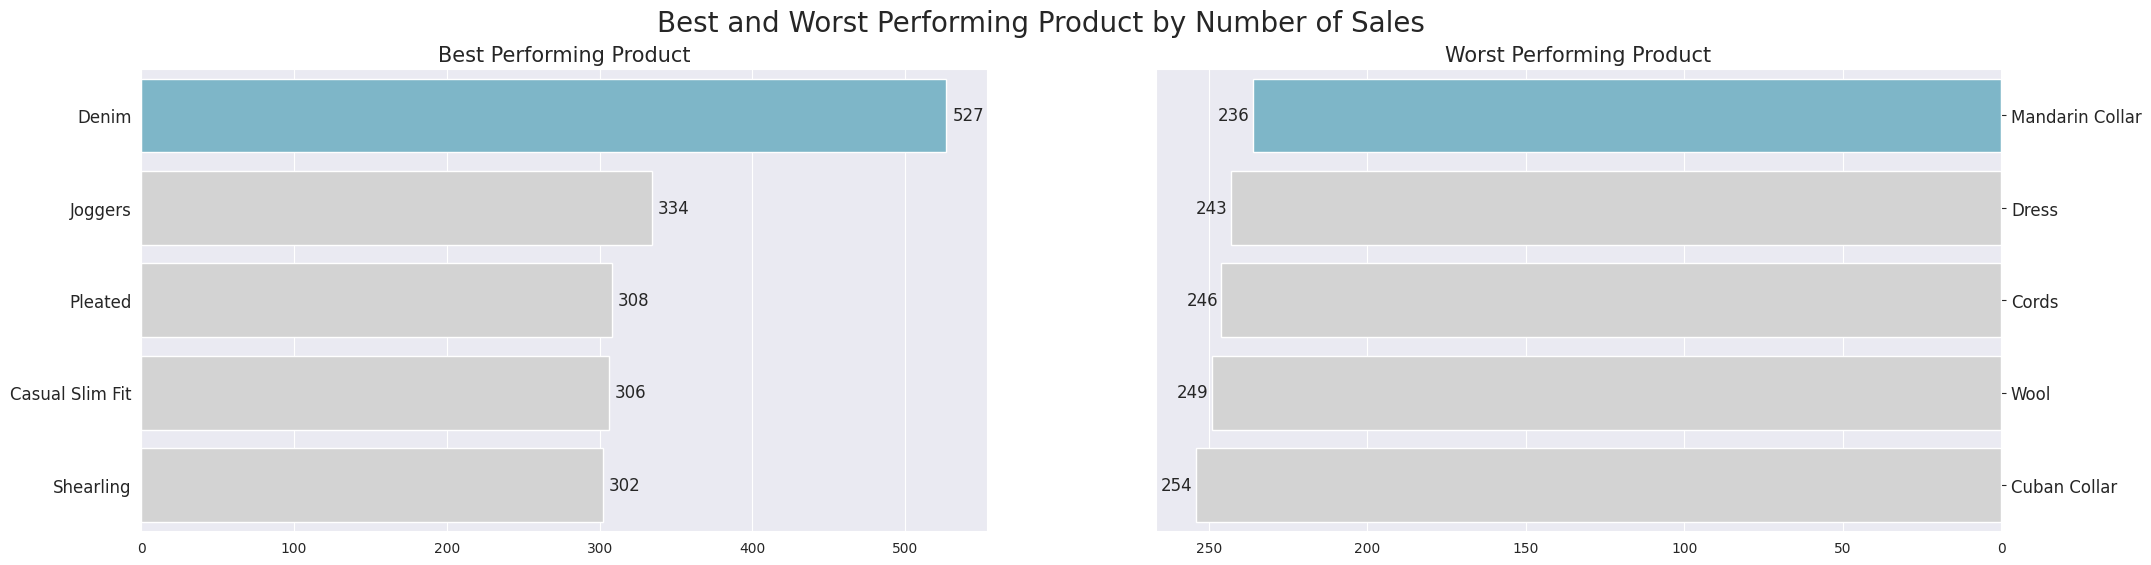

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

# Plot pertama
sns.barplot(
    x='quantity_x',
    y='product_name',
    data=sum_order_items_df.head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Best Performing Product', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

for i in range(len(sum_order_items_df.head(5))):
    ax[0].text(
        sum_order_items_df['quantity_x'].iloc[i] + 4,
        i,
        sum_order_items_df['quantity_x'].iloc[i],
        va='center',
        fontsize=12
    )

# Plot kedua
asc_sum_order = sum_order_items_df.sort_values(
    by='quantity_x', ascending=True
).head(5)

sns.barplot(
    x='quantity_x',
    y='product_name',
    data=asc_sum_order,
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Performing Product', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

for i, value in enumerate(asc_sum_order['quantity_x']):
    ax[1].text(
        value + 11,
        i,
        value,
        va='center',
        fontsize=12
    )

plt.suptitle('Best and Worst Performing Product by Number of Sales', fontsize=20)

- Berdasarkan gambar di atas, terlihat bahwa produk **Denim** memiliki penjualan yang **paling tinggi**.
- Sebaliknya, produk **Mandarin Collar** memiliki penjualan yang **paling rendah.**

## 3rd Question

- Bagaimana Demografi Pelanggan yang Kita Miliki?

Tujuan dari pertanyaan ini adalah untuk menyimpan informasi terkait jumlah pelanggan untuk demografi tertentu, seperti gender, state, dan sebagainya.

### By gender

In [81]:
bygender_df = all_df.groupby(by='gender').customer_id.nunique().reset_index()
bygender_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

bygender_df

,gender,customer_count
0,Female,73
1,Male,82
2,Prefer not to say,461


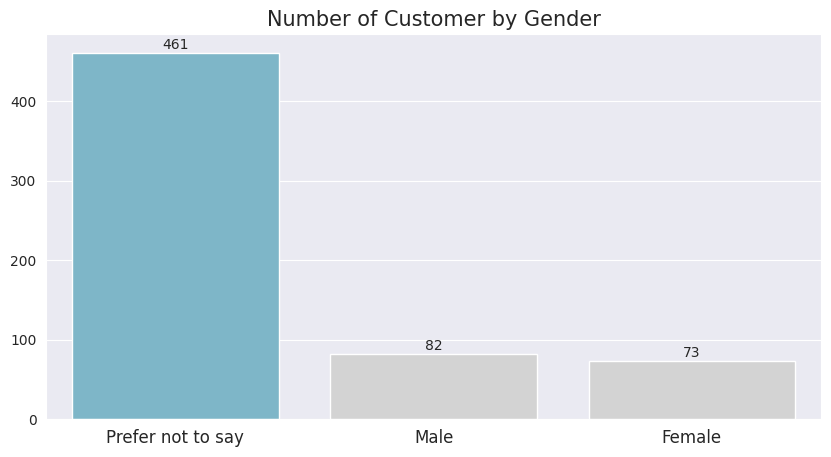

In [82]:
desc_bygender_df = bygender_df.sort_values(by='customer_count', ascending=False)

plt.figure(figsize=(10, 5))

sns.barplot(
    data=desc_bygender_df,
    y='customer_count',
    x='gender',
    palette=colors
)
plt.title('Number of Customer by Gender', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

for i, value in enumerate(desc_bygender_df['customer_count']):
    plt.text(
        i,
        value + 5,
        value,
        ha='center'
    )

- Dari hasil plot di atas, bahwa sebagian besar pelanggan tidak mengungkapkan informasi tentang gender mereka.

### By age

In [83]:
byage_df = all_df.groupby(by='age_group').customer_id.nunique().reset_index()
byage_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

byage_df

,age_group,customer_count
0,Adults,416
1,Seniors,145
2,Youth,55


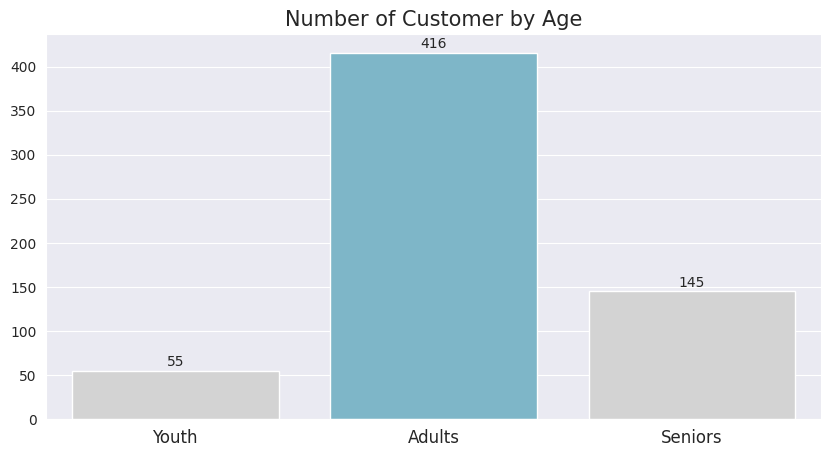

In [84]:
plt.figure(figsize=(10, 5))
colors_ = ['#D3D3D3', '#72BCD4', '#D3D3D3']

ax = sns.barplot(
    data=byage_df,
    y='customer_count',
    x='age_group',
    order=['Youth', 'Adults', 'Seniors'],
    palette=colors_
)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 1),
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('Number of Customer by Age', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

- Dari plot di atas, bahwa mayoritas pelanggan  adalah kelompok usia dewasa (adults).

### By state

In [85]:
bystate_df = all_df.groupby(by='state').customer_id.nunique().reset_index()
bystate_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

bystate_df

,state,customer_count
0,Australian Capital Territory,73
1,New South Wales,77
2,Northern Territory,75
3,Queensland,79
4,South Australia,90
5,Tasmania,67
6,Victoria,75
7,Western Australia,80


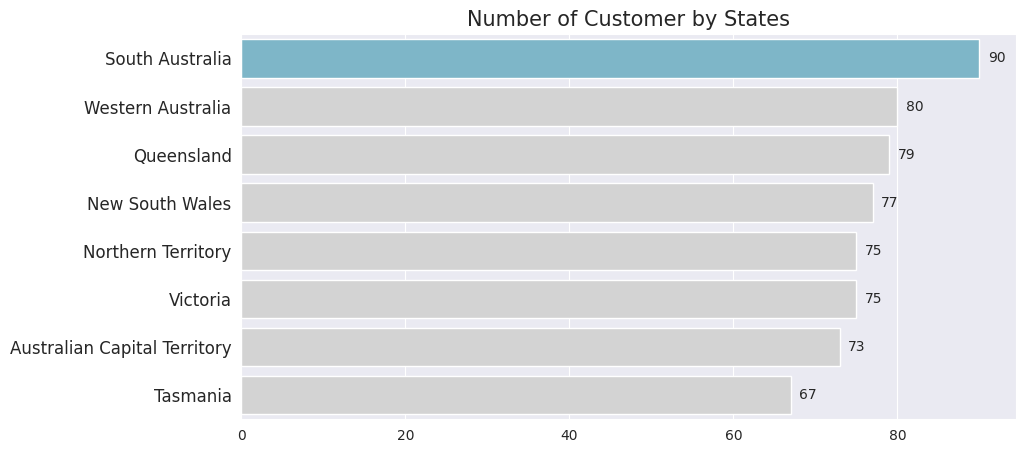

In [86]:
colors_ = ['#72BCD4', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']
desc_bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=desc_bystate_df,
    x='customer_count',
    y='state',
    palette=colors_
)
plt.title('Number of Customer by States', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)

for i, value in enumerate(desc_bystate_df['customer_count']):
    plt.text(
        x=value + 1,
        y=i,
        s=value,
        va='center',
    )

- Berdasarkan visualisasi di atas, bahwa pelanggan yang paling banyak berasal dari negara bagian **South Australia**.

## RFM Analysis

Untuk menjawab tiga pertanyaan analisis terakhir, dapat digunakan teknik analisis yaitu RFM analysis. RFM analysis adalah metode segmentasi pelanggan berdasarkan tiga parameter yaitu *recency*, *frequency*, dan *monetary*.
- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [87]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'order_date': 'max', # mengambil tanggal order terakhir
    'order_id': 'nunique', # menghitung jumlah order
    'total_price': 'sum' # menghitung jumlah revenue yang dihasilkan
})

rfm_df

,customer_id,order_date,order_id,total_price
0,1,2021-04-04,3,1641
1,7,2021-05-21,1,1017
2,10,2021-03-09,1,270
3,11,2021-05-28,1,382
4,12,2021-06-19,1,1551
...,...,...,...,...
611,994,2021-01-12,1,1716
612,995,2021-08-02,1,2140
613,996,2021-09-03,2,3045
614,998,2021-07-19,4,4415


In [88]:
rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']
rfm_df.head(2)

,customer_id,max_order_timestamp,frequency,monetary
0,1,2021-04-04,3,1641
1,7,2021-05-21,1,1017


In [89]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = orders_df['order_date'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(
    lambda x: (recent_date - x).days
)

In [90]:
rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


In [91]:
asc_recency_rfm_df = rfm_df.sort_values(by="recency", ascending=True).head(5)
asc_recency_rfm_df

,customer_id,frequency,monetary,recency
241,401,4,3093,0
425,687,1,1122,0
426,690,3,3693,0
98,163,3,3494,1
250,415,2,2269,1


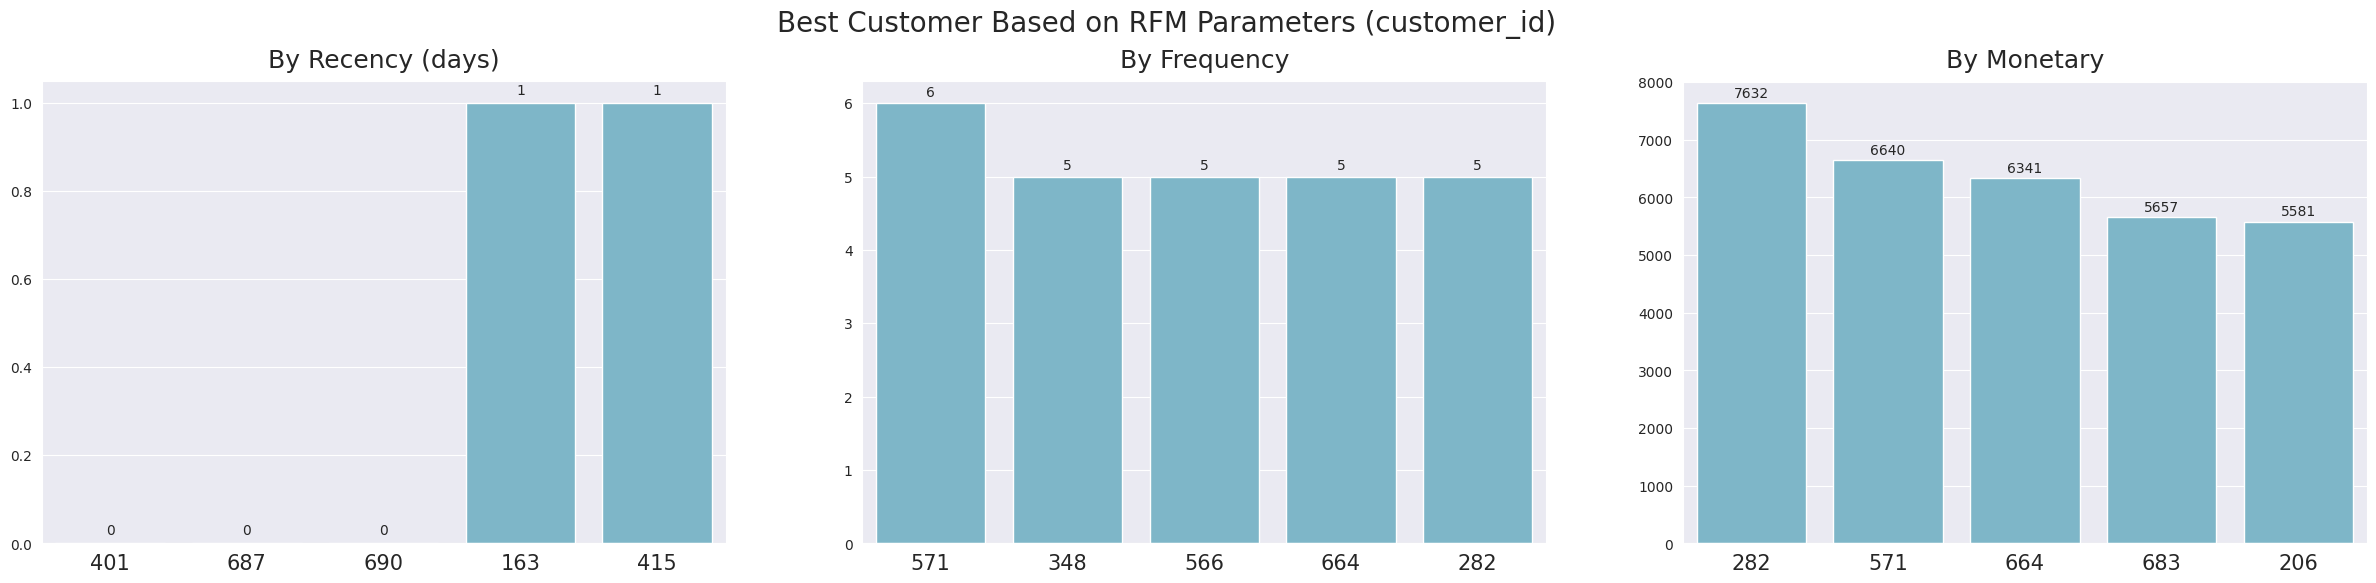

In [92]:
colors = ['#72BCD4']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Plot pertama
asc_recency_rfm_df = rfm_df.sort_values(by='recency', ascending=True).head(5)
sns.barplot(
    y='recency',
    x='customer_id',
    data=asc_recency_rfm_df,
    palette=colors,
    order=asc_recency_rfm_df['customer_id'],
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (days)', loc='center', fontsize=18, pad=10)
ax[0].tick_params(axis ='x', labelsize=15)

for i, value in enumerate(asc_recency_rfm_df['recency']):
    ax[0].text(
        x=i,
        y=value + 0.02,
        s=value,
        ha='center',
    )

# Plot kedua
desc_frequency_rfm_df = rfm_df.sort_values(by='frequency', ascending=False).head(5)
sns.barplot(
    y='frequency',
    x='customer_id',
    data=desc_frequency_rfm_df,
    palette=colors,
    order=desc_frequency_rfm_df['customer_id'],
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency', loc='center', fontsize=18, pad=10)
ax[1].tick_params(axis='x', labelsize=15)

for i, value in enumerate(desc_frequency_rfm_df['frequency']):
    ax[1].text(
        x=i,
        y=value + 0.1,
        s=value,
        ha='center',
    )

# Plot ketiga
desc_monetary_rfm_df = rfm_df.sort_values(by='monetary', ascending=False).head(5)
sns.barplot(
    y='monetary',
    x='customer_id',
    data=desc_monetary_rfm_df,
    palette=colors,
    order=desc_monetary_rfm_df['customer_id'],
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By Monetary', loc='center', fontsize=18, pad=10)
ax[2].tick_params(axis='x', labelsize=15)

for i, value in enumerate(desc_monetary_rfm_df['monetary']):
    ax[2].text(
        x=i,
        y=value + 100,
        s=value,
        ha='center',
    )

plt.suptitle('Best Customer Based on RFM Parameters (customer_id)',
             fontsize=20, y=1);

- Dari visualisasi data di atas, terlihat beberapa pelanggan yang memiliki performa terbaik berdasarkan ketiga parameter tersebut.

## Save Data Files

In [93]:
all_df.to_csv('all_data.csv', index=False)

# CONCLUSION & RECOMMENDATION

**Kesimpulan**

- Berdasarkan hasil **penjualan** dan **revenue** perusahaan dalam beberapa bulan terakhir, terlihat bahwa **bulan Maret** memiliki jumlah pesanan **terbanyak** dengan **117 pesanan**. Namun, terdapat **penurunan** yang signifikan dalam jumlah pesanan pada **bulan Februari, April, Mei,** dan **Oktober**. Hal ini juga berdampak pada pendapatan perusahaan. Untuk mengatasi penurunan ini, perlu dilakukan analisis lebih lanjut terkait faktor-faktor seperti keberadaan kompetitor dan *marketing campaign*.

- Dalam hal penjualan produk, **produk Denim** adalah yang **paling banyak terjual** dengan **527** unit, sementara produk **Mandarin Collar** adalah yang **paling sedikit** terjual dengan **236** unit.

- **Demografi pelanggan** menunjukkan bahwa sebagian besar **pelanggan tidak mengungkapkan informasi** tentang **gender** mereka. Namun, mayoritas pelanggan adalah kelompok **usia dewasa** dengan **416** pelanggan. Pelanggan terbanyak berasal dari state **South Australia**.

- Terakhir, pelanggan melakukan transaksi setidaknya **1 hari yang lalu**, bahkan ada yang melakukan transaksi pada **hari yang sama**. Seorang pelanggan biasanya melakukan **pembelian** sebanyak **5** atau **6 kali** dalam beberapa bulan terakhir. Pelanggan yang paling banyak menghabiskan uang adalah sebesar **AUD 7632** Dollar.

**Rekomendasi**

Berdasarkan hasil ini, perusahaan dapat lebih fokus pada **meningkatkan penjualan** pada bulan-bulan dengan penurunan pesanan. Selain itu, perusahaan juga dapat memperluas **strategi pemasaran** dan **mengidentifikasi peluang baru** untuk menarik lebih banyak pelanggan. Penting juga untuk mempertahankan dan meningkatkan kepuasan pelanggan yang sudah ada dengan memberikan layanan yang baik dan produk-produk yang berkualitas.